![sutd](img/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Mini Project**

<center>**Due 17 June 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002189

Name: Li Xingxuan

Students with whom you have discussed (if any):

## Introduction

Language models are very useful for a wide range of applications, e.g., speech recognition and machine translation. Consider a sentence consisting of words $x_1, x_2, …, x_m$, where $m$ is the length of the sentence, the goal of language modeling is to model the probability of the sentence, where $m \geq 1$, $x_i \in V $ and $V$ is the vocabulary of the corpus:
$$p(x_1, x_2, …, x_m)$$
In this project, we are going to explore both statistical language model and neural language model on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) datasets.

## Statistical  Language Model

A simple way is to view words as independent random variables (i.e., zero-th order Markovian assumption). The joint probability can be written as:
$$p(x_1, x_2, …, x_m)=\prod_{i=1}^m p(x_i)$$
However, this model ignores the word order information, to account for which, under the first-order Markovian assumption, the joint probability can be written as:
$$p(x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-1})$$
Under the second-order Markovian assumption, the joint probability can be written as:
$$p(x_{-1}, x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-2}, x_{i-1})$$
Similar to what we did in HMM, we will assume that $x_{-1}=START, x_0=START, x_m = STOP$ in this definition, where $START, STOP$ are special symbols referring to the start and the end of a sentence.







### Parameter estimation

Let's use $count(u)$ to denote the number of times the unigram $u$ appears in the corpus, use $count(v, u)$ to denote the number of times the bigram $v, u$ appears in the corpus, and $count(w, v, u)$ the times the trigram $w, v, u$ appears in the corpus, $u \in V \cup STOP$ and $w, v \in V \cup START$.

And the parameters of the unigram, bigram and trigram models can be obtained using maximum likelihood estimation (MLE).

- In the unigram model, the parameters can be estimated as: $$p(u) = \frac {count(u)}{c}$$, where $c$ is the total number of words in the corpus.
- In the bigram model, the parameters can be estimated as:
$$p(u \mid v) = \frac{count(v, u)}{count(v)}$$
- In the trigram model, the parameters can be estimated as:
$$p(u \mid w, v) = \frac{count(w, v, u)}{count(w, v)}$$




### Smoothing the parameters
Note, it is likely that many parameters of bigram and trigram models will be 0 because the relevant bigrams and trigrams involved do not appear in the corpus. If you don't have a way to handle these 0 probabilities, all the sentences that include such bigrams or trigrams will have probabilities of 0.

We'll use a Add-k Smoothing method to fix this problem, the smoothed parameter can be estimated as:
$$p_{add-k}(u)= \frac{count(u)+k}{c+k|V^*|}$$
$$p_{add-k}(u \mid v)= \frac{count(v, u)+k}{count(v)+k|V^*|}$$
$$p_{add-k}(u \mid w, v)= \frac{count(w, v, u)+k}{count(w, v)+k|V^*|}$$

where $k \in (0, 1)$ is the parameter of this approach, and $|V^*|$ is the size of the vocabulary $V^*$,here $V^*= V \cup STOP$. One way to choose the value of $k$ is by
optimizing the perplexity of the development set, namely to choose the value that minimizes the perplexity.



### Perplexity

Given a test set $D^{\prime}$ consisting of sentences $X^{(1)}, X^{(2)}, …, X^{(|D^{\prime}|)}$, each sentence $X^{(j)}$ consists of words $x_1^{(j)}, x_2^{(j)},…,x_{n_j}^{(j)}$, we can measure the probability of each sentence $s_i$, and the quality of the language model would be the probability it assigns to the entire set of test sentences, namely:
$$\prod_j^{D^{\prime}}p(X^{(j)})$$
Let's define average log2 probability as:
$$l=\frac{1}{c^{\prime}}\sum_{j=1}^{|D^{\prime}|}log_2p(X^{(j)})$$
$c^{\prime}$ is the total number of words in the test set, $D^{\prime}$ is the number of sentences. And the perplexity is defined as:
$$perplexity=2^{-l}$$

The lower the perplexity, the better the language model.

#### Task 1 (4 points)
Remove the empty lines in the datasets, convert all the texts to lower cases, then compute counts of unigrams, bigrams, trigrams of the train corpus in the file "wiki.train.tokens". Do not take the START and STOP symbols into consideration for this task.
- List numbers of **unique** unigrams, bigrams and trigrams respectively.
- List 10 most frequent unigrams, bigrams and trigrams as well as their counts.

In [1]:
##Write your code here
file_path = 'data/wiki.train.tokens'
tokens = []
   
with open(file_path) as f:
    for line in f:
        if line != '' and line != ' \n':
            tokens += line.lower().split()

In [2]:
def compute_n_grams(tokens):
    unigrams = {}
    for i in range(len(tokens)):
        if tokens[i] not in unigrams:
            unigrams[tokens[i]] = 1
        else:
            unigrams[tokens[i]] += 1

    sorted_unigrams = sorted(unigrams.items() , reverse=True, key=lambda x: x[1])
    
    bigrams = {}
    for i in range(len(tokens)-1):
        if (tokens[i], tokens[i+1]) not in bigrams:
            bigrams[(tokens[i], tokens[i+1])] = 1
        else:
            bigrams[(tokens[i], tokens[i+1])] += 1

    sorted_bigrams = sorted(bigrams.items() , reverse=True, key=lambda x: x[1])
    
    trigrams = {}
    for i in range(len(tokens)-2):
        if (tokens[i], tokens[i+1], tokens[i+2]) not in trigrams:
            trigrams[(tokens[i], tokens[i+1], tokens[i+2])] = 1
        else:
            trigrams[(tokens[i], tokens[i+1], tokens[i+2])] += 1

    sorted_trigrams = sorted(trigrams.items() , reverse=True, key=lambda x: x[1])
    
    return sorted_unigrams, sorted_bigrams, sorted_trigrams

In [3]:
sorted_unigrams, sorted_bigrams, sorted_trigrams = compute_n_grams(tokens)

In [4]:
## Unigrams
print('Number of unique unigrames is', len(sorted_unigrams))
for i in range(10):
    print('The top', i+1, 'item is', sorted_unigrams[i])

Number of unique unigrames is 28911
The top 1 item is ('the', 130768)
The top 2 item is (',', 99913)
The top 3 item is ('.', 73388)
The top 4 item is ('of', 57030)
The top 5 item is ('<unk>', 54625)
The top 6 item is ('and', 50735)
The top 7 item is ('in', 44982)
The top 8 item is ('to', 39521)
The top 9 item is ('a', 36156)
The top 10 item is ('=', 29570)


In [5]:
## Bigrams
print('Number of unique bigrams is', len(sorted_bigrams))
for i in range(10):
    print('The top', i+1, 'item is', sorted_bigrams[i])

Number of unique bigrams is 584839
The top 1 item is (('=', '='), 17816)
The top 2 item is (('of', 'the'), 17284)
The top 3 item is (('.', 'the'), 13156)
The top 4 item is (('in', 'the'), 11800)
The top 5 item is ((',', 'and'), 11675)
The top 6 item is ((',', 'the'), 8034)
The top 7 item is (('<unk>', ','), 7707)
The top 8 item is (('to', 'the'), 6018)
The top 9 item is (('.', '='), 5025)
The top 10 item is (('.', 'in'), 4698)


In [6]:
## Trigrams
print('Number of unique trigrams is', len(sorted_trigrams))
for i in range(10):
    print('The top', i+1, 'item is', sorted_trigrams[i])

Number of unique trigrams is 1376448
The top 1 item is (('=', '=', '='), 7254)
The top 2 item is (('.', '=', '='), 4604)
The top 3 item is ((',', 'and', 'the'), 1395)
The top 4 item is (('=', '=', 'the'), 1166)
The top 5 item is ((',', '<unk>', ','), 951)
The top 6 item is (('.', 'in', 'the'), 938)
The top 7 item is (('<unk>', ',', '<unk>'), 903)
The top 8 item is (('one', 'of', 'the'), 866)
The top 9 item is (('<unk>', ',', 'and'), 822)
The top 10 item is (('.', 'however', ','), 807)


###### Task 2 (4 points)

Estimate the parameters for the bigram and trigram models through maximum-likelihood estimation respectively, compute the parameter for each n-gram in the file "ngram.txt", list down the n-grams that have 0 probability. 

Take the START and STOP symbols into consideration. For example, given a sentence "I like NLP", in a bigram model, we need to pad it as "START I like NLP STOP", in a trigram model, we need to pad it as "START START I like NLP STOP".

In [7]:
##Write your code here
## Pad tokens
bi_pad_tokens = ['START'] + tokens + ['STOP']
tri_pad_tokens = ['START', 'START'] + tokens + ['STOP']

pad_unigrams = {}
for i in range(len(bi_pad_tokens)):
    if bi_pad_tokens[i] not in pad_unigrams:
        pad_unigrams[bi_pad_tokens[i]] = 1
    else:
        pad_unigrams[bi_pad_tokens[i]] += 1

pad_bigrams = {}
for i in range(len(bi_pad_tokens)-1):
    if (bi_pad_tokens[i], bi_pad_tokens[i+1]) not in pad_bigrams:
        pad_bigrams[(bi_pad_tokens[i], bi_pad_tokens[i+1])] = 1
    else:
        pad_bigrams[(bi_pad_tokens[i], bi_pad_tokens[i+1])] += 1
        
pad_trigrams = {}
for i in range(len(tri_pad_tokens)-2):
    if (tri_pad_tokens[i], tri_pad_tokens[i+1], tri_pad_tokens[i+2]) not in pad_trigrams:
        pad_trigrams[(tri_pad_tokens[i], tri_pad_tokens[i+1], tri_pad_tokens[i+2])] = 1
    else:
        pad_trigrams[(tri_pad_tokens[i], tri_pad_tokens[i+1], tri_pad_tokens[i+2])] += 1

In [8]:
tasks = []
with open('data/ngram.txt') as f:
    for line in f:
        tasks.append(tuple(line.split()))
# tasks

In [9]:
for i in range(len(tasks)):
    if len(tasks[i]) == 2:
        try:
            temp = pad_bigrams[tasks[i]] / unigrams[tasks[i][0]]
        except:
            temp = 0
    else:
        try:
            temp = pad_trigrams[tasks[i]] / pad_bigrams[(tasks[i][0], tasks[i][1])]
        except:
            temp = 0
    print('The parameter for', tasks[i], 'is', temp)

The parameter for ('the', 'computer') is 0
The parameter for ('go', 'to') is 0
The parameter for ('have', 'had') is 0
The parameter for ('and', 'the') is 0
The parameter for ('can', 'sea') is 0
The parameter for ('a', 'number', 'of') is 0.9573170731707317
The parameter for ('with', 'respect', 'to') is 0.5833333333333334
The parameter for ('in', 'terms', 'of') is 1.0
The parameter for ('not', 'good', 'bad') is 0
The parameter for ('first', 'start', 'with') is 0


#### Task 3 (6 points)
Use the Add-k smoothing method to smooth parameters of bigram and trigram models respectively, choose the parameter $k$ from the set {0.1, 0.3, 0.5, 0.7, 0.9} on the development set for each model. Compute the smoothed parameters of n-grams in the file "ngram.txt". The development data is in the file "wiki.valid.tokens".

In [1]:
##Write your code here
import math
valid_path = 'data/wiki.valid.tokens'
valid_tokens = []
ks = [0.1, 0.3, 0.5, 0.7, 0.9]
   
with open(valid_path) as f:
    for line in f:
        if line != '' and line != ' \n':
            valid_tokens += line.lower().split()

In [11]:
# Bigram
def bigram_smooth(valid_tokens, k):
    l = 0
    valid_bipad_tokens = ['START'] + valid_tokens  + ['STOP']
    for i in range(len(valid_bipad_tokens) - 1):
        try:
            temp=pad_bigrams[(valid_bipad_tokens[i],valid_bipad_tokens[i+1])]+k
        except:
            temp = k
        try:
            below = pad_unigrams[valid_bipad_tokens[i]]+k*(len(sorted_unigrams)+1)
        except:
            below = k*(len(sorted_unigrams)+1)
        temp/=below
        l += math.log2(temp)
    l = - (l / len(valid_tokens))
    return 2 **l

In [12]:
best_k_bi = 0
best_per_bi = float('inf')
for k in ks:
    per = bigram_smooth(valid_tokens, k)
    print('Perplexity for', k, 'is', per)
    if per < best_per_bi:
        best_k_bi = k
        best_per_bi = per
print('Best k for Bigram is', best_k_bi)

Perplexity for 0.1 is 781.9120995300893
Perplexity for 0.3 is 1116.6096397677986
Perplexity for 0.5 is 1354.3140633280566
Perplexity for 0.7 is 1551.0569194009263
Perplexity for 0.9 is 1723.4016097109486
Best k for Bigram is 0.1


In [13]:
# Trigram
def trigram_smooth(valid_tokens, k):
    l = 0
    valid_tripad_tokens = ['START', 'START'] + valid_tokens  + ['STOP']
    for i in range(len(valid_tripad_tokens) - 2):
        try:
            temp=pad_trigrams[(valid_tripad_tokens[i],valid_tripad_tokens[i+1],valid_tripad_tokens[i+2])]+k
        except:
            temp = k
        try:
            below = pad_bigrams[(valid_tripad_tokens[i],valid_tripad_tokens[i+1])]+k*(len(sorted_unigrams)+1)
        except:
            below = k*(len(sorted_unigrams)+1)
        temp/=below
        l += math.log2(temp)
    l = - (l / len(valid_tokens))
    return 2 **l

In [14]:
best_k_tri = 0
best_per_tri = float('inf')
for k in ks:
    per = trigram_smooth(valid_tokens, k)
    print('Perplexity for', k, 'is', per)
    if per < best_per_tri:
        best_k_tri = k
        best_per_tri = per
print('Best k for Trigram is', best_k_tri)

Perplexity for 0.1 is 5473.528027918837
Perplexity for 0.3 is 7650.633716733188
Perplexity for 0.5 is 8979.915369324997
Perplexity for 0.7 is 9966.004516630523
Perplexity for 0.9 is 10755.507251462555
Best k for Trigram is 0.1


In [15]:
for i in range(len(tasks)):
    if len(tasks[i]) == 2:
        try:
            temp=pad_bigrams[tasks[i]]+k
        except:
            temp = k
        try:
            below = pad_unigrams[tasks[i][0]]+k*(len(sorted_unigrams)+1)
        except:
            below = k*(len(sorted_unigrams)+1)
        temp/=below
    else:
        try:
            temp=pad_trigrams[tasks[i]]+k
        except:
            temp = k
        try:
            below = pad_bigrams[(tasks[i][0],tasks[i][1])]+k*(len(sorted_unigrams)+1)
        except:
            below = k*(len(sorted_unigrams)+1)
        temp/=below
    print('The parameter for', tasks[i], 'is', temp)

The parameter for ('the', 'computer') is 8.865429163307584e-05
The parameter for ('go', 'to') is 0.0015537270454873537
The parameter for ('have', 'had') is 0.0015225087145821748
The parameter for ('and', 'the') is 0.05669799546092933
The parameter for ('can', 'sea') is 3.2917837078651684e-05
The parameter for ('a', 'number', 'of') is 0.011951208404177798
The parameter for ('with', 'respect', 'to') is 0.0003034633231922805
The parameter for ('in', 'terms', 'of') is 0.0024497964253674693
The parameter for ('not', 'good', 'bad') is 3.458505618150238e-05
The parameter for ('first', 'start', 'with') is 3.4575755480257244e-05


#### Task 4 (4 points)

Use the smoothed bigram and trigram models to compute the perplexity of the test set in the file  "wiki.test.tokens" respectively. Which model has a lower perplexity?

In [16]:
##Write your code here
test_path = 'data/wiki.test.tokens'
test_tokens = []
   
with open(test_path) as f:
    for line in f:
        if line != '' and line != ' \n':
            test_tokens += line.lower().split()

In [17]:
bi_perplexity = bigram_smooth(test_tokens, 0.1)
print('Bigram perplexity for test set is', bi_perplexity)
tri_perplexity = trigram_smooth(test_tokens, 0.1)
print('Trigram perplexity for test set is', tri_perplexity)

Bigram perplexity for test set is 729.4484503476807
Trigram perplexity for test set is 5132.413761862848


## Neural Language Model

Using the chain rule, the probability of a sentence consisting of words $x_1, x_2, ..., x_n$ can be represented as:

$$p(x_1, x_2, ..., x_n) = \prod_{i=1}^n p(x_t \mid x_{t-1}, ..., x_1)$$

Assume that we can use a hidden vector $h_t\in R^d$ of a recurrent neural network (RNN) to record the history information of words:
$$h_t = RNN(x_t, h_{t-1})$$

The conditional probability of word $x_{t+1}$ can be parameterized as:
$$p(x_{t+1} \mid x_{t}, x_{t-1}, ..., x_1) \propto exp(f(w_{x_{t+1}}h_{t}))$$

$d$ is the dimension size of the hidden layer, $|V|$ is the size of the vocabulary. $f$ is a fully-connected layer, where $w \in R^{|V| \times d}$ are the parameters, $w_{x_{t+1}}$ is the parameter in the row that corresponds to the index of $x_{t+1}$ in the vocabulary, the bias is omitted. 



#### Task 5 (12 points)
We will create a LSTM language model, and train it on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) dataset. The data generators(train_iter, valid_iter, test_iter) and the LSTM model(in the file "lstm\_model.py") have been provided. The word embeddings together with the parameters in the LSTM model will be learned from scratch.
Our tasks:
- Complete the training and evaluating code, tune hyperparameters on the validation data, then compute the perplexity of the test data. The test perplexity should be below 150. (5 points)
- Visualize word embeddings trained by our language model as in Homework 1, try to find patterns, i.e., are similar words clustering? (2 points)
- Implement a 2-layer bidirectional LSTM language model as shown in Fig 1, train the language model from both directions, compute the perplexity of the test data for each direction. Note, the forward and backward LSTMs do not share parameters, and the outputs from the previous layer can be only passed to the next layer in the same direction. (5 points)
![bilstm](img/bilstm.png)

<center>Fig 1: 2-layer Bidirectionl LSTM Language Model Architecture

The START and STOP symbols have been added to the sentences in the generators, and the second dimension of the outputs of generators is the index of the batch.

[Pytorch](https://pytorch.org/tutorials/) is required in this part. Do not make any changes to the provided code unless you are requested to do so. 

In [1]:
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText2
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)

In [2]:
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<sos>')
train, valid, test = WikiText2.splits(TEXT) 

In [3]:
#Build a vocabulary from the train dataset
TEXT.build_vocab(train)
print('Vocabulary size:', len(TEXT.vocab))

Vocabulary size: 28908


In [4]:
#Create data generators
BATCH_SIZE = 64
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=32,
    repeat=False)

In [5]:
print(len(train_iter))
print(len(valid_iter))
print(len(test_iter))

1096
121
138


In [6]:
#Generate a batch of train data
batch = next(iter(train_iter))
text, target = batch.text, batch.target

In [7]:
print('Size of text tensor',text.size())
print('Size of target tensor',target.size())

Size of text tensor torch.Size([32, 64])
Size of target tensor torch.Size([32, 64])


In [8]:
##Write your code here
classifier = LSTMModel(vocab_size=len(TEXT.vocab), emb_size=64, hidden_size=64, num_layer=2)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.005)

In [11]:
def trainRNN(model, optimizer, train_iter):
    criterion = torch.nn.NLLLoss()
    model.train()
    opt_loss = 0
    hidden = model.init_hidden(64)
    for i, batch in enumerate(train_iter):
#         print(batch.target.size())
        optimizer.zero_grad()
        output, hidden = model(batch.text, hidden)
#         print(output.size())
        loss = criterion(output.reshape([32*64, 28908]), batch.target.reshape(32*64,))
        loss.backward()
        optimizer.step()
        opt_loss += loss.item()
        if i%10 == 0 and i != 0:
            print('-- batch', i, '--')
#             print(torch.argmax(output, 1))
            print('loss', opt_loss/i)
    print('Final training loss is', opt_loss/len(train_iter))
    return opt_loss/len(train_iter)

In [12]:
opt_loss = trainRNN(classifier, optimizer, train_iter)

-- batch 10 --
loss 10.258363199234008
-- batch 20 --
loss 8.736065244674682
-- batch 30 --
loss 8.237352784474691
-- batch 40 --
loss 7.975195324420929
-- batch 50 --
loss 7.790173187255859
-- batch 60 --
loss 7.659997431437175
-- batch 70 --
loss 7.569610350472587
-- batch 80 --
loss 7.494050419330597
-- batch 90 --
loss 7.437911574045817
-- batch 100 --
loss 7.397030458450318
-- batch 110 --
loss 7.36586233919317
-- batch 120 --
loss 7.330533599853515
-- batch 130 --
loss 7.30030458523677
-- batch 140 --
loss 7.2744867256709504
-- batch 150 --
loss 7.255797344843547
-- batch 160 --
loss 7.236056315898895
-- batch 170 --
loss 7.217669296264648
-- batch 180 --
loss 7.204218623373244
-- batch 190 --
loss 7.1924976800617415
-- batch 200 --
loss 7.182668025493622
-- batch 210 --
loss 7.173686352230254
-- batch 220 --
loss 7.167193235050548
-- batch 230 --
loss 7.158860766369363
-- batch 240 --
loss 7.152265139420828
-- batch 250 --
loss 7.145975580215454
-- batch 260 --
loss 7.1400416796

In [145]:
def valRNN(model, optimizer, valid_iter):
    criterion = torch.nn.NLLLoss()
    model.eval()
    opt_loss = 0
    perplexity = 0
    hidden = model.init_hidden(64)
    with torch.no_grad():
        for i, batch in enumerate(valid_iter):
            size_x = batch.text.size()[0]*batch.text.size()[1]
            output, hidden = model(batch.text, hidden)
            loss = criterion(output.reshape([size_x, 28908]), batch.target.reshape(size_x,))
            opt_loss += loss.item()
            
            for j in range(size_x - 1):
                opt_reshape = output.reshape([size_x, 28908])
                perplexity += math.log2(math.exp(opt_reshape[j, batch.target.reshape(size_x,)[j].item()].item()))
#                 opt_reshape[j, batch.target.reshape(size_x,)[j].item()].item()
            if i%10 == 0 and i != 0:
                print('-- batch', i, '--')
                print('loss', opt_loss/i)
                print('perplexity', math.pow(2, -perplexity/(batch.text.size()[0]*batch.text.size()[1]*(i+1))))
    print('Final testing loss is', opt_loss/len(valid_iter))
    print('Final perplexity is', math.pow(2, -perplexity/(batch.text.size()[0]*batch.text.size()[1]*len(valid_iter))))
    return opt_loss/len(valid_iter), math.pow(2, -perplexity/(batch.text.size()[0]*batch.text.size()[1]*len(valid_iter)))

In [147]:
average_loss, perplexity = valRNN(classifier, optimizer, test_iter)

-- batch 10 --
loss 5.936151170730591
perplexity 9.334124180994229
-- batch 20 --
loss 5.637724566459656
perplexity 9.199409903166883
-- batch 30 --
loss 5.526246436436971
perplexity 9.136797046079236
-- batch 40 --
loss 5.450850188732147
perplexity 9.04350470698952
-- batch 50 --
loss 5.428130693435669
perplexity 9.032847883100086
-- batch 60 --
loss 5.418380069732666
perplexity 9.03729440707681
-- batch 70 --
loss 5.408901493889945
perplexity 9.04267573164418
-- batch 80 --
loss 5.392224472761154
perplexity 9.017739650174088
-- batch 90 --
loss 5.390909915500217
perplexity 9.045350797624058
-- batch 100 --
loss 5.378343224525452
perplexity 9.038449614109773
-- batch 110 --
loss 5.374320680444891
perplexity 9.042114526538324
-- batch 120 --
loss 5.370130678017934
perplexity 9.045233756370951
-- batch 130 --
loss 5.365696305495042
perplexity 9.041088841185747
Final testing loss is 5.326513908911442
Final perplexity is 16.693741082730547


In [15]:
### Visualize
import numpy as np
embbeding = classifier.encoder

In [16]:
def PCA(X, k=2):
 # preprocess the data
 X_mean = torch.mean(X,0)
 X = X - X_mean.expand_as(X)

 # svd
 U,S,V = torch.svd(torch.t(X))
 return torch.mm(X,U[:,:k])

In [17]:
embedding_pca = PCA(embbeding.weight)

In [18]:
import matplotlib.pyplot as plt
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')

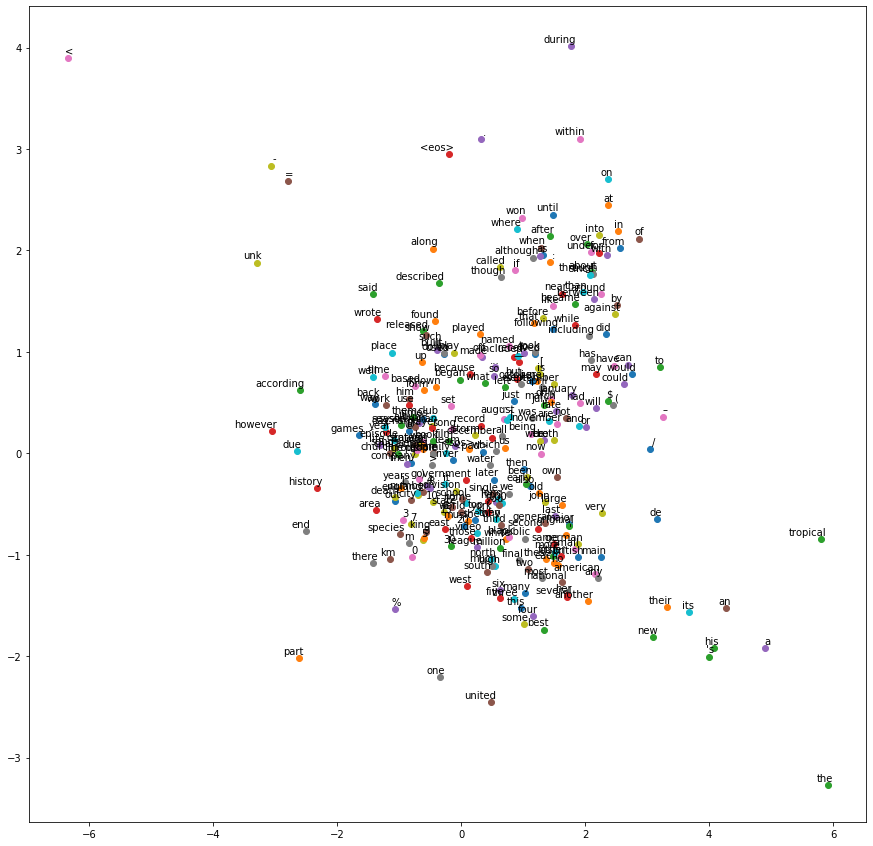

In [26]:
plot(embedding_pca.detach().numpy()[1:300, :], TEXT.vocab.itos[1:300])

In [12]:
### Bi directional LSTM
class BILSTMModel(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size, num_layer, dropout=0.5):
        super(BILSTMModel, self).__init__()
        self.hidden_size, self.num_layer = hidden_size, num_layer
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(vocab_size, emb_size)
        self.frnn = nn.LSTM(emb_size, hidden_size, num_layer, dropout=dropout)
        self.brnn = nn.LSTM(emb_size, hidden_size, num_layer, dropout=dropout)
        self.decoder = nn.Linear(hidden_size, vocab_size)
        self.softmax = nn.Softmax(dim=2)
        self.init_weights()
        
    def init_weights(self):
        '''Initialize weights'''
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.fill_(0)
        self.decoder.weight.data.uniform_(-initrange, initrange)
        
    def repackage_hidden(self, h):
        """Detach tensor from their history, no gradient backpropaged"""
        return tuple(v.detach() for v in h)
        
    def forward(self, input_tensor, fhidden, bhidden):
        #Get embeddings for the input tensors
        emb = self.encoder(input_tensor)
        #dropout
        emb = self.drop(emb)
        #Remove history of hidden states
        fhidden = self.repackage_hidden(fhidden)
        bhidden = self.repackage_hidden(bhidden)
        #rnn layer
#         print(emb.size())
        foutput, fhidden = self.frnn(emb, fhidden)
        boutput, bhidden = self.brnn(torch.flip(emb, [0, 1]), bhidden)
        #dropout
        foutput = self.drop(foutput)
        boutput = self.drop(boutput)
        fdecoded = self.decoder(foutput.view(foutput.size(0)*foutput.size(1), foutput.size(2)))
        bdecoded = self.decoder(boutput.view(boutput.size(0)*boutput.size(1), boutput.size(2)))
        foutputs = fdecoded.view(foutput.size(0), foutput.size(1), fdecoded.size(1))
        boutputs = bdecoded.view(boutput.size(0), boutput.size(1), bdecoded.size(1))
        #Compute the softmax values
        foutputs = self.softmax(foutputs)
        boutputs = self.softmax(boutputs)
        #Set the values within a range
        foutputs = torch.clamp(foutputs, min=0.000000001, max=100000)
        boutputs = torch.clamp(boutputs, min=0.000000001, max=100000)
        #Compute log values
        foutputs = torch.log(foutputs)
        boutputs = torch.log(boutputs)
        return foutputs, torch.flip(boutputs, [0, 1]), fhidden, bhidden
    
    def init_hidden(self, batch_size):
        '''
        Initialize LSTM hidden states
        '''
        weight = next(self.parameters())
        return (weight.new_zeros(self.num_layer, batch_size, self.hidden_size),
                    weight.new_zeros(self.num_layer, batch_size, self.hidden_size))

In [14]:
bi_classifier = BILSTMModel(vocab_size=len(TEXT.vocab), emb_size=64, hidden_size=64, num_layer=2)
optimizer = torch.optim.Adam(bi_classifier.parameters(), lr=0.005)

In [15]:
def trainBIRNN(model, optimizer, train_iter):
    criterion = torch.nn.NLLLoss()
    model.train()
    fopt_loss = 0
    bopt_loss = 0
    fhidden = model.init_hidden(64)
    bhidden = model.init_hidden(64)
    for i, batch in enumerate(train_iter):
#         print(batch.target.size())
        optimizer.zero_grad()
        foutput, boutput, fhidden, bhidden = model(batch.text, fhidden, bhidden)
#         print(output.size())
        floss = criterion(foutput.reshape([32*64, 28908]), batch.target.reshape(32*64,))
        bloss = criterion(boutput.reshape([32*64, 28908]), batch.target.reshape(32*64,))
#         model.frnn.requires_grad = True
#         model.brnn.requires_grad = False
        floss.backward(retain_graph=True)
        optimizer.step()
        
#         model.brnn.requires_grad = True
#         model.frnn.requires_grad = False
        bloss.backward()
        optimizer.step()
        fopt_loss += floss.item()
        bopt_loss += bloss.item()
        if i%10 == 0 and i != 0:
            print('-- batch', i, '--')
#             print(torch.argmax(output, 1))
            print('forward loss', fopt_loss/i)
            print('backward loss', bopt_loss/i)
    print('Final forward training loss is', fopt_loss/len(train_iter))
    print('Final backward training loss is', bopt_loss/len(train_iter))
    return fopt_loss/len(train_iter), bopt_loss/len(train_iter)

In [16]:
fopt_loss, bopt_loss = trainBIRNN(bi_classifier, optimizer, train_iter)

-- batch 10 --
forward loss 9.446424865722657
backward loss 9.640315532684326
-- batch 20 --
forward loss 8.383799695968628
backward loss 8.47004954814911
-- batch 30 --
forward loss 7.977179050445557
backward loss 8.018095239003499
-- batch 40 --
forward loss 7.752448928356171
backward loss 7.771955907344818
-- batch 50 --
forward loss 7.601378393173218
backward loss 7.605487098693848
-- batch 60 --
forward loss 7.498809552192688
backward loss 7.495167541503906
-- batch 70 --
forward loss 7.4332095282418384
backward loss 7.4238815580095565
-- batch 80 --
forward loss 7.379222315549851
backward loss 7.364218437671662
-- batch 90 --
forward loss 7.339955393473307
backward loss 7.318351258171929
-- batch 100 --
forward loss 7.3132385158538815
backward loss 7.285732774734497
-- batch 110 --
forward loss 7.289555298198353
backward loss 7.259418019381436
-- batch 120 --
forward loss 7.261918874581655
backward loss 7.228243700663248
-- batch 130 --
forward loss 7.238841838103074
backward los

-- batch 1050 --
forward loss 6.296424971989223
backward loss 5.196050868715559
-- batch 1060 --
forward loss 6.293276211900531
backward loss 5.1878365215265525
-- batch 1070 --
forward loss 6.289305341577975
backward loss 5.178983860372383
-- batch 1080 --
forward loss 6.2855877315556565
backward loss 5.17031503783332
-- batch 1090 --
forward loss 6.282190933577511
backward loss 5.162233903429923
Final forward training loss is 6.274997470152639
Final backward training loss is 5.153789535491136


In [17]:
def valBIRNN(model, optimizer, valid_iter):
    criterion = torch.nn.NLLLoss()
    model.eval()
    fopt_loss = 0
    bopt_loss = 0
    fperplexity = 0
    bperplexity = 0
    fhidden = model.init_hidden(64)
    bhidden = model.init_hidden(64)
    with torch.no_grad():
        for i, batch in enumerate(valid_iter):
            reshape_x = batch.text.size()[0]*batch.text.size()[1]
            foutput, boutput, fhidden, bhidden = model(batch.text, fhidden, bhidden)
            floss = criterion(foutput.reshape([reshape_x, 28908]), batch.target.reshape(reshape_x,))
            bloss = criterion(boutput.reshape([reshape_x, 28908]), batch.target.reshape(reshape_x,))            
            fopt_loss += floss.item()
            bopt_loss += bloss.item()
            
            for j in range(reshape_x - 1):
                fopt_reshape = foutput.reshape([reshape_x, 28908])
                bopt_reshape = boutput.reshape([reshape_x, 28908])
                fperplexity += math.log2(math.exp(torch.max(fopt_reshape[j]).item()))
                bperplexity += math.log2(math.exp(torch.max(bopt_reshape[j]).item()))
                
            if i%10 == 0 and i != 0:
                print('-- batch', i, '--')
                print('forward loss', fopt_loss/i)
                print('backward loss', bopt_loss/i)
                print('forward perplexity', math.pow(2, -fperplexity/(reshape_x*(i+1))))
                print('backward perplexity', math.pow(2, -bperplexity/(reshape_x*(i+1))))
    print('Final forward testing loss is', fopt_loss/len(valid_iter))
    print('Final backward testing loss is', bopt_loss/len(valid_iter))
    print('Final forward perplexity is', math.pow(2, -fperplexity/(32*64*len(valid_iter))))
    print('Final backward perplexity is', math.pow(2, -bperplexity/(32*64*len(valid_iter))))
    return fopt_loss/len(valid_iter), math.pow(2, -fperplexity/(32*64*len(valid_iter))), bopt_loss/len(valid_iter), math.pow(2, -bperplexity/(32*64*len(valid_iter)))

In [20]:
fopt_loss, fperplexity, bopt_loss, bperplexity = valBIRNN(bi_classifier, optimizer, test_iter)

-- batch 10 --
forward loss 5.718734407424927
backward loss 3.672631859779358
forward perplexity 8.394165913183944
backward perplexity 7.360326706530785
-- batch 20 --
forward loss 5.430258297920227
backward loss 3.4903866052627563
forward perplexity 8.320883638775557
backward perplexity 7.253037169587252
-- batch 30 --
forward loss 5.323259544372559
backward loss 3.4205997149149576
forward perplexity 8.286393764630162
backward perplexity 7.203789213465848
-- batch 40 --
forward loss 5.252871179580689
backward loss 3.3713402152061462
forward perplexity 8.2184328238453
backward perplexity 7.112429839883261
-- batch 50 --
forward loss 5.2296403121948245
backward loss 3.3584553384780884
forward perplexity 8.214267226205392
backward perplexity 7.120912061926921
-- batch 60 --
forward loss 5.220614806811015
backward loss 3.352662181854248
forward perplexity 8.228945748591121
backward perplexity 7.152646864784619
-- batch 70 --
forward loss 5.208892842701503
backward loss 3.3465357507978166


#### Task 6 (Optional, 6 points)
We can train our 2-layer bidirectional LSTM language model on a relatively large dataset [wikitext-103](https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip) and explore some interesting characteristics of the model. Our tasks:
- Generate a piece of text ending with the STOP symbol but no more than 50 words given the START symbol, check whether it is fluent or not based on your tuition.
- Feed each sentence of the movie reviews in homework 1 to our language model, concatenate the outputs of forward and backward LSTMs as the contextualized embedding for each word in the sentence.
- Train the provided RNN Classifier in homework 1 based on the contextualized word embeddings of the train set, tune parameters on the development set and evaluate the performances on the test set.
- Consider “play”, a highly polysemous word, find 20 sentences including "play", half of them refer to the verb, and half of them refer to the noun. Visualize the contextualized embeddings of "play" in the sentences, check whether the embeddings can capture the contextual information or not.

References: 

- [EXPLORING THE LIMITS OF LANGUAGE MODELING](https://arxiv.org/pdf/1602.02410.pdf)
- [IMPROVING NEURAL LANGUAGE MODELS WITH A CONTINUOUS CACHE](https://arxiv.org/pdf/1612.04426.pdf)
- [LEARNING LONGER MEMORY IN RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1412.7753.pdf)

In [ ]:
##Write your code here

### Requirements:
- This is an individual report.
- Complete the code using Python.
- List students with whom you have discussed if there are any.
- Follow the honor code strictly.

### Free GPU Resources
We suggest that you run neural language models on machines with GPU(s). Google provides the free online platform [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use as common packages have been  pre-installed. Google users can have access to a Tesla T4 GPU (approximately 15G memory). Note that when you connect to a GPU-based VM runtime, you are given a maximum of 12 hours at a time on the VM.

It is convenient to upload local Jupyter Notebook files and data to Colab, please refer to the [tutorial](https://colab.research.google.com/notebooks/io.ipynb). 

In addition, Microsoft also provides the online platform [Azure Notebooks](https://notebooks.azure.com/help/introduction) for research of data science and machine learning, there are free trials for new users with credits.